In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import ols
import numpy as np
import matplotlib.pyplot as plt

In [3]:
n = 2000
p = 1000
seed = 123

np.random.seed(seed)
X = np.random.normal(size=(n,p))
beta = np.random.uniform(-1, 1, p) * np.random.binomial(1, 0.2, p)
y = X @ beta + np.random.normal(size=n)

In [4]:
Q, R = np.linalg.qr(X, 'reduced')
beta_hat = np.linalg.solve(R, Q.T @ y)

In [6]:
ols_pbcd_out = ols.ols_pbcd(X, y, tol=1e-10)
ols_pbcd_out[2:]

(Array(5.820766e-11, dtype=float32), Array(3, dtype=int32, weak_type=True))

In [23]:
ols_epbcd_out = ols.ols_epbcd(X, y, n_batches=2, tol=1e-7, method='opt')
ols_epbcd_out[2:]

0.838139642743742
0.11312831316164758
0.023472221571637992
0.008853330914332248
0.0037887578593496347
0.002084099834582519
0.0011308500188071968
0.0007096058245965552
0.0004302031766350889
0.00028718862521283454
0.00018495277680034405
0.00012783434008157833
8.549818706187245e-05
6.045827339399144e-05
4.15051573882023e-05
2.985619494264255e-05
2.0890066929230968e-05
1.5236158995230892e-05
1.0813235280254126e-05
7.975669535183508e-06
5.7217739499804096e-06


KeyboardInterrupt: 

In [26]:
ols_combined_out = ols.ols_combined(X, y, n_batches=16, tol=1e-4, method='greedy')
ols_combined_out[2:]

0.1417034227406141
0.10146305919310127
0.09485454524007765
0.07999104912806054
0.06921213917493653
0.06175016448944429
0.0563635233907518
0.05461402627746301
0.046425119468055415
0.04227236592210128
0.034378111156476425
0.028705675150355266
0.023584264798981673
0.022169434699456054
0.016801441713412243
0.015019119840774458
0.013670953496444916
0.011296908003294678
0.00870154668379943
0.008028975531134373
0.007579240388150557
0.004827942593716324
0.004359124911647939
0.004064925386114709
0.003856385944092064
0.00352172710173819
0.0030197534700485474
0.0025669799586578836
0.002376717398735736
0.0022233822229100223
0.001617494696185896
0.001495608177332283
0.0015480633970681988
0.0012395081099065071
0.0011619005350141233
0.0009073024693848044
0.0008597784057562748
0.000850140700756922
0.0008563058143782855
0.0007612251973532969
0.0008187385023390491
0.0008193190434428322
0.00064753523536737
0.0005535414927955772
0.0005740085791203112
0.0004530037754973026
0.00040918594776459115
0.00038383

(9.969699243614936e-10, 40)

In [28]:
ols_bcd_out = ols.ols_bcd(X, y, beta0=None, tol=1e-10)
ols_bcd_out[2:]

105.21047531473425
12.937964296970126
1.8951884669728216
0.5933898722279447
0.24617917084694446
0.1186249888692523
0.06207600190847807
0.034120535785709304
0.019359758115171564
0.011238962195264686
0.0066444091727613066
0.003989124004546057
0.0024273842091682226
0.0014946973765201483
0.0009300902697551073
0.0005841434695735769
0.0003698747022643622
0.00023588320461723406
0.00015137674974316547
9.767801299825492e-05
6.332948762463803e-05
4.12306126016684e-05
2.6940465533711884e-05
1.7658710117060256e-05
1.160660861694931e-05
7.647010378534317e-06
5.0487756211608e-06
3.339446093742508e-06
2.2123718996750412e-06
1.4677490593052282e-06
9.749482731909132e-07
6.483110091632187e-07
4.315208198062352e-07
2.874673113311263e-07
1.9164685871394457e-07
1.2785129772126588e-07
8.534286576339268e-08
5.699812274476445e-08
3.808564819355756e-08
2.5459448716190428e-08
1.7025725034499574e-08
1.1389790841535286e-08
7.621949011640364e-09
5.102053042055675e-09
3.416194840867868e-09
2.2879710737586726e-09
1.

(9.33264157952659e-11, 54)

In [31]:
np.linalg.norm(y-X@ols_bcd_out[0]), np.linalg.norm(y-X@ols_pbcd_out[0]), np.linalg.norm(y-X@ols_epbcd_out[0]), np.linalg.norm(y-X@ols_combined_out[0])

(29.98876449769569, 29.988766, 29.98877000537464, 29.98876452628498)

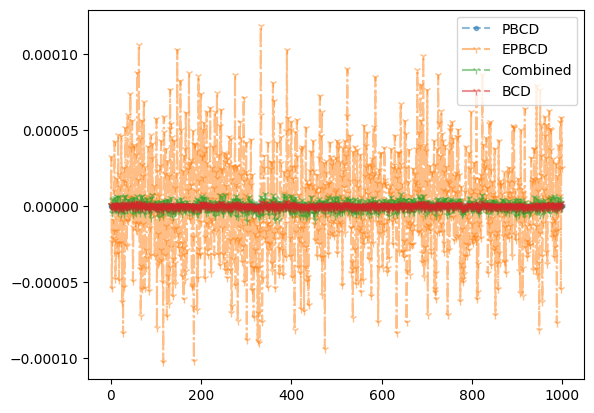

In [33]:
plt.plot(ols_pbcd_out[0]-beta_hat, label='PBCD', linestyle='--',  marker='.', alpha=0.5)
plt.plot(ols_epbcd_out[0]-beta_hat, label='EPBCD', linestyle='-.', marker='1', alpha=0.5)
plt.plot(ols_combined_out[0]-beta_hat, label='Combined', linestyle='-.', marker='1', alpha=0.5)
plt.plot(ols_bcd_out[0]-beta_hat, label='BCD', linestyle='-.',  marker='1', alpha=0.5)
#plt.plot(beta_hat, label='Truth', linestyle='-', color='red', marker='v', alpha=0.5)
plt.legend()
plt.show()